### Data analysis on sales data

<h4> what have to sortout from the dataset</h4>

<ul>
    <li>Analyzing sales trends over time.</li>
    <li>Understanding customer preferences for different items.</li>
    <li>Evaluating the impact of payment methods on revenue.</li>
    <li>Investigating the performance of staff members based on gender.</li>
    <li>Exploring the popularity of items at different times of the day.</li>
</ul>

<h4>import required libraries</h4>

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

#### load dataset

In [5]:
df=pd.read_csv('BalajiFastFoodSales.csv')

In [6]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [7]:
df.shape

(1000, 10)

In [8]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [10]:
df.transaction_type.isnull().sum()

np.int64(107)

In [11]:
df.transaction_type.unique()

array([nan, 'Cash', 'Online'], dtype=object)

In [12]:
df[df['transaction_type']=='card'].sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: object

In [13]:
# fill the nan values in transactiontype with card
df['transaction_type']=df['transaction_type'].fillna('card')

In [14]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,card,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,card,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,card,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,card,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,card,Mrs.,Afternoon


In [15]:
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [16]:
df['date']=df['date'].apply(lambda x:x.replace('-','/'))

In [17]:
df.head(1)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07/03/2022,Aalopuri,Fastfood,20,13,260,card,Mr.,Night


In [18]:
#change date object to datetime
df['date']=pd.to_datetime(df['date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [20]:
df['date'].min()

Timestamp('2022-04-01 00:00:00')

In [21]:
df['date'].max()

Timestamp('2023-03-30 00:00:00')

In [22]:
df['year-month']=df['date'].apply(lambda x:x.strftime('%y-%m'))


In [23]:
df.head(1)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year-month
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,card,Mr.,Night,22-07


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
 10  year-month          1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 86.1+ KB


In [25]:
sales_trend=pd.DataFrame(df.groupby('year-month')['transaction_amount'].sum().reset_index())

In [26]:
sales_trend

,year-month,transaction_amount
0,22-04,17670
1,22-05,26570
2,22-06,17335
3,22-07,19490
4,22-08,22305
5,22-09,18640
6,22-10,27205
7,22-11,22900
8,22-12,23460
9,23-01,28670


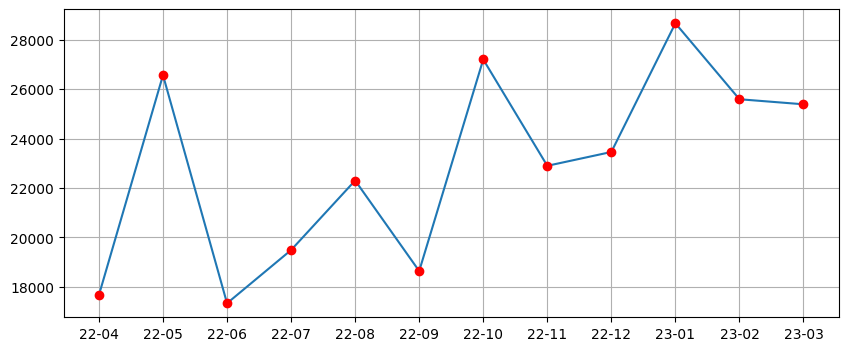

In [27]:

plt.figure(figsize=(10,4))
plt.plot(sales_trend['year-month'],sales_trend['transaction_amount'],marker='o',mfc='r',mec='r')
plt.grid()
plt.show()


<h3>understanding customer preferences on different items</h3>

In [28]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year-month
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,card,Mr.,Night,22-07
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,22-08
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,22-11
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,23-02
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,22-10


In [29]:
custome_pref=pd.DataFrame(df.groupby(df['item_name'])['quantity'].sum().reset_index())

In [30]:
custome_pref

,item_name,quantity
0,Aalopuri,1044
1,Cold coffee,1361
2,Frankie,1150
3,Panipuri,1226
4,Sandwich,1097
5,Sugarcane juice,1278
6,Vadapav,1006


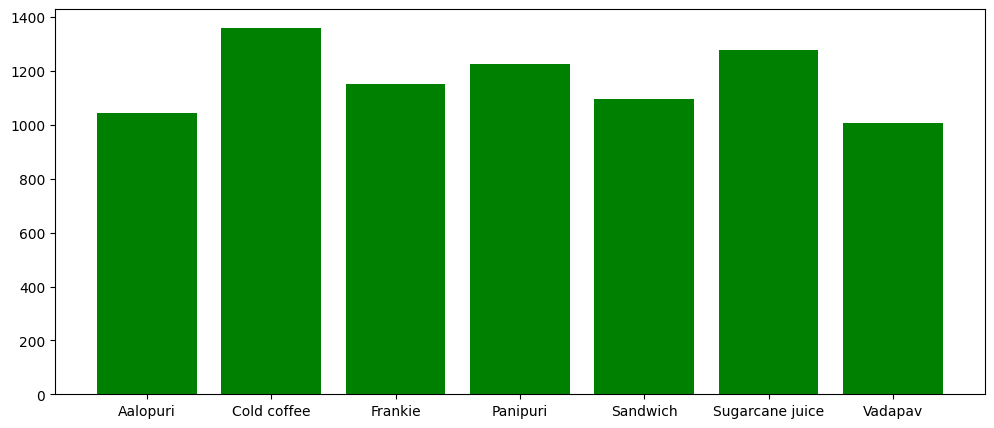

In [31]:
plt.figure(figsize=(12,5))
plt.bar(custome_pref['item_name'],custome_pref['quantity'],color='g')
plt.show()

<p>from the above data we can undertand that <b>cold coffee</b> has more customer preference.</p>

<h3>evaluating impact of transaction_type in revenue</h3>

In [33]:
trans_rev=pd.DataFrame(df.groupby(df['transaction_type'])['transaction_amount'].sum().reset_index())

In [34]:
trans_rev

,transaction_type,transaction_amount
0,Cash,132840
1,Online,110595
2,card,31795


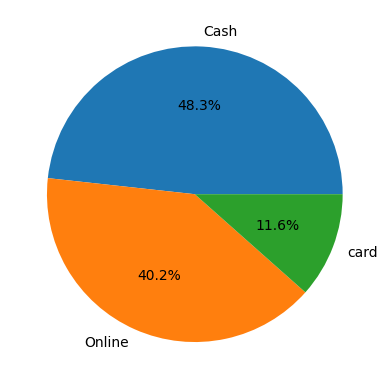

In [35]:
plt.pie(trans_rev['transaction_amount'],labels=trans_rev['transaction_type'],autopct='%1.1f%%')
plt.show()

<p>48.3% of revenue is generated by cash sales</p>

<h3>Investigating the performance of staff members based on gender.</h3>

In [38]:
employee_perf=pd.DataFrame(df.groupby(df['received_by'])['transaction_amount'].sum().reset_index())

In [40]:
employee_perf

,received_by,transaction_amount
0,Mr.,143440
1,Mrs.,131790


In [47]:
employee_perf['ratio in percentage']=(employee_perf['transaction_amount']/employee_perf['transaction_amount'].sum())*100

In [48]:
employee_perf

,received_by,transaction_amount,ratio in percentage
0,Mr.,143440,52.116412
1,Mrs.,131790,47.883588


<h3>Exploring the popularity of items at different times of the day.</h3>

In [55]:
df.groupby(['time_of_sale','item_type'])['quantity'].sum().reset_index()

,time_of_sale,item_type,quantity
0,Afternoon,Beverages,662
1,Afternoon,Fastfood,1052
2,Evening,Beverages,518
3,Evening,Fastfood,1022
4,Midnight,Beverages,440
5,Midnight,Fastfood,1135
6,Morning,Beverages,493
7,Morning,Fastfood,1081
8,Night,Beverages,526
9,Night,Fastfood,1233
